In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

viridis = mpl.colormaps["viridis"]


def color_p(p):
    return viridis(p / 8)

In [2]:
df = pd.read_csv(f"/home/jp7427/Desktop/FVHOE/out/compare_sd_timing_square.csv")
df["total_nDOFs"] = df.nDOFs * df.nDOFs
df["updates_per_s"] = df.steps * df.substeps * df.total_nDOFs / df.execution_time

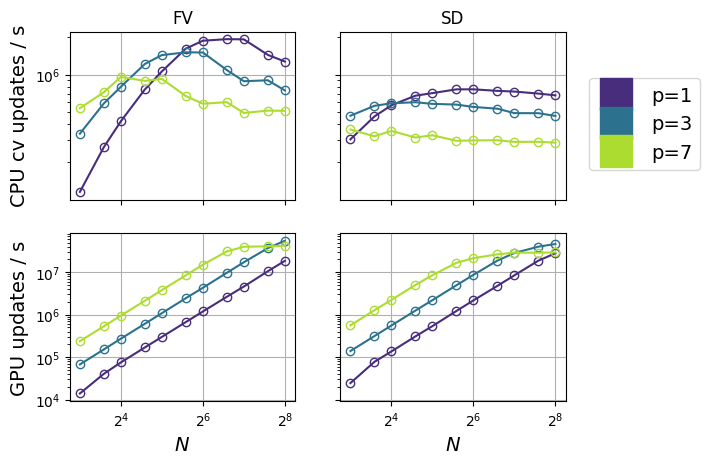

In [3]:
fontsize = 14

fig, ax = plt.subplots(2, 2, sharex=True, sharey="row")

nDOFs_xvar = False

for cupy, df_cupy in df.groupby("cupy"):
    for scheme, df_scheme in df_cupy.groupby("scheme"):
        for p, df_p in df_scheme.groupby("p"):
            ax[{True: 1, False: 0}[cupy], {"fv": 0, "sd": 1}[scheme]].plot(
                df_p.total_nDOFs if nDOFs_xvar else df_p.N,
                df_p.updates_per_s,
                color=color_p(p),
                label=f"{p=}",
                marker="o",
                mfc="none",
            )

ax[1, 0].set_xscale("log", base=2)
ax[1, 1].set_xscale("log", base=2)
ax[0, 0].set_yscale("log")
ax[1, 0].set_yscale("log")
ax[0, 0].grid()
ax[0, 1].grid()
ax[1, 0].grid()
ax[1, 1].grid()

if nDOFs_xvar:
    ax[1, 0].set_xlabel("$\# DOFs$", fontsize=fontsize)
    ax[1, 1].set_xlabel("$\# DOFs$", fontsize=fontsize)
else:
    ax[1, 0].set_xlabel(r"$N$", fontsize=fontsize)
    ax[1, 1].set_xlabel(r"$N$", fontsize=fontsize)
ax[0, 0].set_ylabel("CPU cv updates / s", fontsize=fontsize)
ax[1, 0].set_ylabel("GPU updates / s", fontsize=fontsize)
ax[0, 0].set_title("FV")
ax[0, 1].set_title("SD")

leg = ax[0, 1].legend(loc="center", bbox_to_anchor=(1.35, 0.45), fontsize=fontsize)
for line, p in zip(leg.get_lines(), [1, 3, 7]):
    line.set_linestyle("none")
    line.set_marker("s")
    line.set_markersize(23)
    line.set_markerfacecolor(color_p(p))

fig.savefig(
    f"/home/jp7427/Desktop/FVHOE/out/compare_sd_timing_square.png",
    dpi=300,
    bbox_inches="tight",
)

In [4]:
df_euler = pd.read_csv(
    f"/home/jp7427/Desktop/FVHOE/out/compare_sd_timing_square-m=0.csv"
)
df_euler["total_nDOFs"] = df_euler.nDOFs * df_euler.nDOFs
df_euler["updates_per_s"] = (
    df_euler.steps * df_euler.substeps * df_euler.total_nDOFs / df_euler.execution_time
)

In [5]:
df["integrator_cost"] = df_euler["updates_per_s"] / df["updates_per_s"]

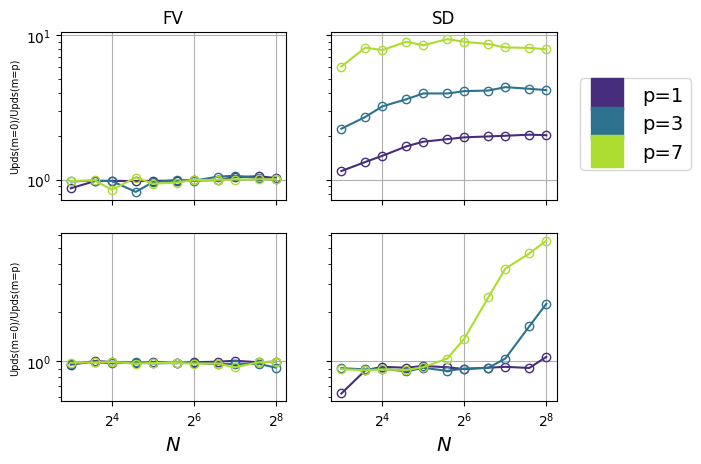

In [6]:
fontsize = 14

fig, ax = plt.subplots(2, 2, sharex=True, sharey="row")

nDOFs_xvar = False

for cupy, df_cupy in df.groupby("cupy"):
    for scheme, df_scheme in df_cupy.groupby("scheme"):
        for p, df_p in df_scheme.groupby("p"):
            ax[{True: 1, False: 0}[cupy], {"fv": 0, "sd": 1}[scheme]].plot(
                df_p.total_nDOFs if nDOFs_xvar else df_p.N,
                df_p.integrator_cost,
                color=color_p(p),
                label=f"{p=}",
                marker="o",
                mfc="none",
            )

ax[1, 0].set_xscale("log", base=2)
ax[1, 1].set_xscale("log", base=2)
ax[0, 0].set_yscale("log")
ax[1, 0].set_yscale("log")
ax[0, 0].grid()
ax[0, 1].grid()
ax[1, 0].grid()
ax[1, 1].grid()

if nDOFs_xvar:
    ax[1, 0].set_xlabel("$\# DOFs$", fontsize=fontsize)
    ax[1, 1].set_xlabel("$\# DOFs$", fontsize=fontsize)
else:
    ax[1, 0].set_xlabel(r"$N$", fontsize=fontsize)
    ax[1, 1].set_xlabel(r"$N$", fontsize=fontsize)
ax[0, 0].set_ylabel("Upds(m=0)/Upds(m=p)", fontsize=7)
ax[1, 0].set_ylabel("Upds(m=0)/Upds(m=p)", fontsize=7)
ax[0, 0].set_title("FV")
ax[0, 1].set_title("SD")

leg = ax[0, 1].legend(loc="center", bbox_to_anchor=(1.35, 0.45), fontsize=fontsize)
for line, p in zip(leg.get_lines(), [1, 3, 7]):
    line.set_linestyle("none")
    line.set_marker("s")
    line.set_markersize(23)
    line.set_markerfacecolor(color_p(p))

fig.savefig(
    f"/home/jp7427/Desktop/FVHOE/out/compare_sd_timing_square.png",
    dpi=300,
    bbox_inches="tight",
)